# Data Cleaning for Text Classification


Created By [Anshul Chaudhary](https://www.linkedin.com/in/chaudharyanshul/)

### Basic Data Processing

In [1]:
import pandas as pd

In [46]:
# load raw data
data = pd.read_json('..\data\excerpts.jsonl', lines=True)

In [3]:
# print data head
data.head()

,id,document_id,document_title,content,is_table,prev_content,next_content,label
0,71833445,510403,Deere & Company 10-Q Q3 2023,​(d)Description of Severance Benefits. Subject...,False,​Condensed Notes to Interim Consolidated Finan...,None,None
1,73134247,512748,McDonald's Corporation 10-Q Q3 2020,"{'normalized_csv': [], 'predicted_headers': []}",True,None,None,None
2,66528922,505472,"Charter Communications, Inc. 10-K FY 2021","There were 193,730,992 shares of Class A commo...",False,"directors, executive officers and the principa...",Information required by Part III is incorporat...,None
3,66095744,505112,A. O. Smith Corporation 10-K FY 2022,For the transition period from to,False,Amount of Award: ______ [RSUs] [Shares] [Targe...,Commission File Number 1-475,None
4,65948148,504996,Adobe Inc. 10-K FY 2020,"(as amended and restated as of January 14, 2021)",False,None,"Adobe Inc. (the “Company”), pursuant to its 20...",None


In [4]:
data.columns

Index(['id', 'document_id', 'document_title', 'content', 'is_table',
       'prev_content', 'next_content', 'label'],
      dtype='object')

inference on the columns by looking at the data:

* id - unique identifier for row
* document_id - unique identifier document
* document_title - title of the document 
* content - main content for the row
* is_table - flag to indicate table 
* prev_content - previous content if any
* next_content - next content if any
* label - Classification factors of content(TEXT, NOISE, FINANCIAL-TABLE)

In [5]:
# check for null values
data.isnull().sum()

id                    0
document_id           0
document_title        0
content               0
is_table              0
prev_content       3674
next_content       3420
label             10000
dtype: int64

In [6]:
# get the labeled data from main data set
df_labeled = data.dropna(subset=['label'])

In [7]:
df_labeled.shape

(382, 8)

Now we only have labeled data

In [8]:
df_labeled.isnull().sum()

id                  0
document_id         0
document_title      0
content             0
is_table            0
prev_content      163
next_content      112
label               0
dtype: int64

Converting the content for table in markdown format for model to easily identify the data

In [9]:
def extract_normalized_table(input) -> str:
    if type(input) == dict:
        if 'normalized_csv' in input:
            table_data = []
            col_sep = '|'
            row_sep = '.'  
            rows = [row for row in input['normalized_csv']]
            for row in rows:
                row_data = [col for col in row]
                row_str = [row_data[i] + col_sep for i in range(len(row_data))]                
                # Example: Consumer installment loans| 35| 35| 6| 6| 41| 41| —| —| 6| 6|.
                table_data.append(' '.join(row_str).replace('\n', ' ') + row_sep)      
                
            return '\n'.join(table_data) if table_data else ''
    return input

In [10]:
# try function on table
extract_normalized_table(df_labeled[df_labeled["is_table"] == True]["content"].iloc[0])

'Continuing Operations| Three Months Ended| Three Months Ended| Three Months Ended| Twelve Months Ended| Twelve Months Ended| Twelve Months Ended|.\n($ in millions, except per share)| Aug. 2, 2020| Jul. 28, 2019| % Change| Aug. 2, 2020| Jul. 28, 2019| % Change|.\nNet Sales| | | | | | |.\nAs Reported (GAAP)| $2,108| $1,780| 18%| $8,691| $8,107| 7%|.\nOrganic| | | 12%| | | 7%|.\nEarnings Before Interest and Taxes (EBIT)| | | | | | |.\nAs Reported (GAAP)| $167| $83| 101%| $1,107| $979| 13%|.\nAdjusted| $307| $252| 22%| $1,449| $1,266| 14%|.\nDiluted Earnings Per Share| | | | | | |.\nAs Reported (GAAP)| $0.28| $(0.02)| n/m| $1.95| $1.57| 24%|.\nAdjusted| $0.63| $0.42| 50%| $2.95| $2.30| 28%|.'

In [11]:
# try to function on non table
extract_normalized_table(df_labeled[df_labeled["is_table"] == False]["content"].iloc[0])

'6. Conditions to Obligations. The several obligations of the Underwriters are subject to the following conditions: (a) No stop order suspending the effectiveness of the Registration Statement shall be in effect, and no proceedings for such purpose shall be pending before or threatened by the Commission. (b) The representations and warranties of the Company contained in this Agreement shall be true and correct as of the date hereof and as of the Closing Date, and the Company shall have complied with all of the agreements and satisfied all of the conditions on its part to be performed or satisfied hereunder on or before the Closing Date. (c) Subsequent to the execution and delivery of this Agreement and prior to the Closing Date: (i) there shall not have occurred any downgrading, nor shall any notice have been given of any intended or potential downgrading or of any review for a possible change (other than a notice of a possible upgrading), in the rating accorded any of the securities o

In [12]:
df_labeled["text"] = df_labeled["content"].apply(lambda x: extract_normalized_table(x))

C:\Users\anshu\AppData\Local\Temp\ipykernel_24096\2756829616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled["text"] = df_labeled["content"].apply(lambda x: extract_normalized_table(x))


In [13]:

df_labeled

,id,document_id,document_title,content,is_table,prev_content,next_content,label,text
16,75846004,522393,CFG 8-K 10/25/18,6. Conditions to Obligations. The several obli...,False,None,(f) The Underwriters shall have received on th...,TEXT,6. Conditions to Obligations. The several obli...
32,79398889,551017,URI 8-K 12/07/22,C: (203) 399-8951,False,None,Indicate by check mark whether the registrant ...,NOISE,C: (203) 399-8951
37,76351219,526475,DIS 8-K 05/08/19 Earnings Release,1,False,None,The following table summarizes the second quar...,NOISE,1
59,76180796,524955,CPB 8-K 09/03/20 Earnings Release,"{'normalized_csv': [['Continuing Operations', ...",True,today reported results for its fourth-quarter ...,None,FIN_TABLE,Continuing Operations| Three Months Ended| Thr...
66,75324462,518706,AME 8-K 05/12/22 Entry into a Material Definit...,"Berwyn, Pa., May 13, 2022 – AMETEK, Inc. (NYSE...",False,None,__________________,TEXT,"Berwyn, Pa., May 13, 2022 – AMETEK, Inc. (NYSE..."
...,...,...,...,...,...,...,...,...,...
10262,75619840,520903,BSX 8-K 01/21/21,651-582-4251,False,Media Relations,Laura.Aumann@bsci.com,NOISE,651-582-4251
10274,77860175,538981,MO 8-K 02/19/20,"{'normalized_csv': [['•', 'required or volunta...",True,None,Check the appropriate box below if the Form 8-...,TEXT,•| required or voluntary product recalls as a ...
10342,79707613,552983,WBA 8-K 10/28/20,buy or sell securities. You understand that th...,False,None,[OGEUKISO21] 15. Insider Trading/Market Abuse ...,NOISE,buy or sell securities. You understand that th...
10350,79001032,547719,SYY 8-K 05/07/18,"{'normalized_csv': [['☐', 'Written communicati...",True,U.S. Foodservice Operations,"Sales for the third quarter were $9.7 billion,...",NOISE,☐| Written communications pursuant to Rule 425...


### Visualizing Data

In [14]:
import matplotlib.pyplot as plt

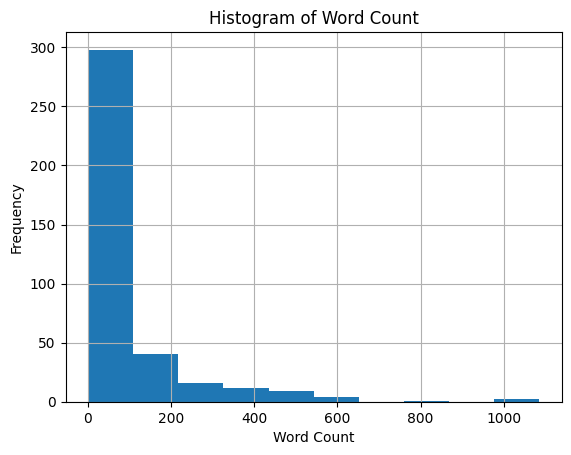

In [17]:
# Plot histogram to understand the average word count 
count_text = df_labeled['text'].apply(lambda x: len(x.split()))
count_text.hist()

# Add titles and labels
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

observations:

* The max number of words are around 0-250 range
* There will be no need to chunk the data, given the embedding will be less than equal to 512 tokens

In [15]:
# label count to get idea about the distribution of the data 
label_count = df_labeled['label'].value_counts()
label_count

label
NOISE        170
TEXT         140
FIN_TABLE     72
Name: count, dtype: int64

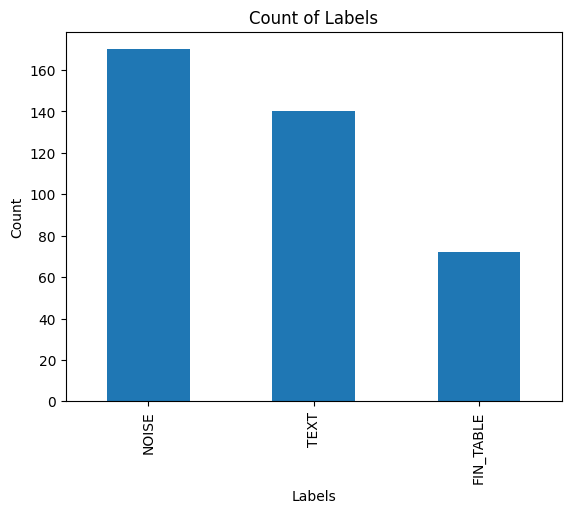

In [19]:
# Create a bar plot
label_count.plot(kind='bar')

# Add titles and labels
plt.title('Count of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Show the plot
plt.show()

observations:

* The data distribution is not equal there might be some bias after training model on this data

### Preparing Data For Training

##### Encode Label

In [16]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [17]:
# Initialize the label encoder
label_encoder = LabelEncoder()  

# Train Encoder
df_labeled['label_encoded'] = label_encoder.fit_transform(df_labeled['label'])

C:\Users\anshu\AppData\Local\Temp\ipykernel_24096\1590422653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['label_encoded'] = label_encoder.fit_transform(df_labeled['label'])


In [18]:
# Export Encoder
encoder_path = "../models/encoder_model.pkl"

with open(encoder_path, "wb") as f: 
  pickle.dump(label_encoder, f)

##### Remove unwanted data

In [19]:
df = df_labeled[["text","label_encoded"]]

In [20]:
df.head()

,text,label_encoded
16,6. Conditions to Obligations. The several obli...,2
32,C: (203) 399-8951,1
37,1,1
59,Continuing Operations| Three Months Ended| Thr...,0
66,"Berwyn, Pa., May 13, 2022 – AMETEK, Inc. (NYSE...",2


##### Export Data

In [21]:
# Save the data
df.to_json("../data/clean_data.json", orient='records')

### convert and export all data keep only text and label

In [47]:
data.columns

Index(['id', 'document_id', 'document_title', 'content', 'is_table',
       'prev_content', 'next_content', 'label'],
      dtype='object')

In [48]:
data["text"] = data["content"].apply(lambda x: extract_normalized_table(x))

In [49]:
data.drop(['id', 'document_id', 'document_title', 'is_table','prev_content', 'next_content', 'content'], axis=1, inplace=True)

In [50]:
data.head()

,label,text
0,None,​(d)Description of Severance Benefits. Subject...
1,None,
2,None,"There were 193,730,992 shares of Class A commo..."
3,None,For the transition period from to
4,None,"(as amended and restated as of January 14, 2021)"


In [52]:
# Save the unlabeled data
data.to_json("../data/unlabeled_data.json", orient='records')